In [2]:
import pandas as pd #dataframe
import numpy as np #array function
import matplotlib.pyplot as plt # Visualization
import seaborn as sns# Visualization
from sklearn import preprocessing #machine learning 

In [4]:
Telco=pd.read_excel('Telco_Churn_Case.xlsx',skiprows=2)

         1.Exploratory Data Analysis
         2.Data Cleaning
         3.Visualization
         4.DataPreprocessing
         5.Create Model(DecisionTree)
         6.Evaluation Metrics
         7.Random Forest
         8.Model Selection
     

#                    Exploratory Data Analysis

In [5]:
Telco.shape

(71047, 30)

In [4]:
Telco.head(10)

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,...,MOU,INCALLS,EQPDAYS,DROPVCE,CUSTOMER,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
0,0.0,0,0,0,0,1,0,0,0,0,...,185.75,0.000000,280.0,2.000000,1033384,0.0000,37.5100,27.5725,48.666667,0.000000
1,0.0,0,0,0,0,1,0,0,0,0,...,3294.25,181.666667,51.0,124.000000,1022818,0.0000,191.6100,114.1025,800.666667,240.333333
2,0.0,0,0,0,0,1,0,0,0,0,...,2582.00,1.000000,188.0,9.333333,1095330,22.4700,187.7200,122.4925,386.000000,46.666667
3,0.0,0,0,0,0,1,0,0,0,0,...,278.75,5.666667,243.0,7.333333,1092012,0.0000,54.6325,64.4275,32.666667,24.000000
4,0.0,0,0,0,0,1,0,0,0,0,...,260.75,6.333333,243.0,13.666667,1092009,0.0000,50.3000,33.7000,33.000000,30.666667
5,0.0,0,0,0,0,1,0,0,0,0,...,585.25,0.000000,379.0,0.000000,1068063,0.0000,70.4600,75.9575,0.000000,0.000000
6,0.0,0,0,0,0,1,0,0,0,0,...,349.00,8.000000,42.0,1.333333,1015004,0.0000,127.0650,46.7800,83.333333,18.000000
7,0.0,0,0,1,0,0,8,0,0,0,...,2515.50,53.333333,54.0,52.000000,1026684,1.9250,41.1175,44.9925,66.000000,164.333333
8,0.0,0,0,0,1,0,4,0,0,0,...,781.50,1.666667,184.0,18.333333,1095516,0.1725,43.1725,46.2000,85.666667,55.333333
9,0.0,0,0,0,1,0,6,0,0,0,...,374.00,0.000000,574.0,0.000000,1041395,0.0000,110.9700,74.9900,0.000000,0.000000


In [6]:
Telco.describe()

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,...,MOU,INCALLS,EQPDAYS,DROPVCE,CUSTOMER,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
count,69803.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,...,70831.000000,71047.000000,71046.000000,71047.000000,7.104700e+04,70831.000000,70831.000000,70831.000000,71047.000000,71047.000000
mean,31.375113,0.242389,0.290076,0.365378,0.249806,0.384816,4.334229,0.007572,0.017833,0.014512,...,525.728392,8.176798,380.265631,6.009968,1.050487e+06,1.221071,58.852803,46.876304,90.580946,25.396526
std,22.082195,0.428531,0.453800,0.481539,0.432904,0.486555,3.137063,0.086690,0.132346,0.119587,...,530.134259,16.519059,254.294692,9.006125,2.919911e+04,9.081089,44.243583,23.915095,104.914866,35.147512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.000000,0.000000,1.000001e+06,0.000000,-6.167500,-11.290000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,158.250000,0.000000,204.000000,0.666667,1.025144e+06,0.000000,33.642500,30.000000,23.000000,3.333333
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,...,366.000000,2.000000,330.000000,3.000000,1.050370e+06,0.000000,48.530000,44.990000,62.000000,13.666667
75%,48.000000,0.000000,1.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,...,721.750000,9.333333,515.000000,7.666667,1.076230e+06,0.257500,71.030000,59.990000,121.166666,34.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,...,7667.750000,519.333333,1823.000000,221.666667,1.099999e+06,1112.447500,1223.380000,399.990000,2090.666667,644.333333


In [9]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 30 columns):
AGE1        69803 non-null float64
CHILDREN    71047 non-null int64
CHURN       71047 non-null int64
MARRYYES    71047 non-null int64
MARRYNO     71047 non-null int64
MARRYUN     71047 non-null int64
INCOME      71047 non-null int64
OCCSTUD     71047 non-null int64
OCCSELF     71047 non-null int64
OCCRET      71047 non-null int64
OCCPROF     71047 non-null int64
OCCHMKR     71047 non-null int64
OCCCRFT     71047 non-null int64
OCCCLER     71047 non-null int64
NEWCELLY    71047 non-null int64
MONTHS      71047 non-null int64
MODELS      71046 non-null float64
PHONES      71046 non-null float64
PCOWN       71047 non-null int64
CALLWAIT    71047 non-null float64
MOU         70831 non-null float64
INCALLS     71047 non-null float64
EQPDAYS     71046 non-null float64
DROPVCE     71047 non-null float64
CUSTOMER    71047 non-null int64
ROAM        70831 non-null float64
REVENUE     708

In [7]:
Telco[Telco['AGE1']>30]

,AGE1,CHILDREN,CHURN,MARRYYES,MARRYNO,MARRYUN,INCOME,OCCSTUD,OCCSELF,OCCRET,...,MOU,INCALLS,EQPDAYS,DROPVCE,CUSTOMER,ROAM,REVENUE,RECCHRGE,PEAKVCE,OUTCALLS
32,34.0,0,0,0,1,0,4,0,0,0,...,718.75,2.666667,23.0,12.000000,1095217,0.0000,51.3500,44.1025,31.333333,11.333333
33,36.0,0,0,0,1,0,6,0,0,0,...,809.25,33.000000,183.0,7.333333,1095575,0.7900,169.0300,76.4425,263.666667,47.000000
34,36.0,0,0,1,0,0,7,0,0,0,...,379.00,0.666667,512.0,2.666667,1006292,0.0000,41.3675,43.7800,81.333333,5.666667
35,36.0,1,0,1,0,0,6,0,0,0,...,1497.75,2.333333,362.0,21.000000,1002765,0.0000,222.1550,78.7800,301.333333,31.000000
36,36.0,1,0,1,0,0,7,0,0,0,...,1338.00,3.000000,668.0,11.666667,1033249,0.1950,72.1250,72.4250,318.000000,19.000000
37,36.0,1,0,1,0,0,6,0,0,0,...,695.00,1.000000,303.0,4.333333,1084741,0.0000,44.5725,46.6600,76.000000,10.666667
38,40.0,1,0,0,1,0,3,0,0,0,...,414.25,0.000000,78.0,14.000000,1033422,0.0000,52.0075,29.3450,30.666667,29.666667
39,40.0,1,0,1,0,0,6,0,0,0,...,54.50,0.000000,264.0,1.333333,1076080,1.2175,37.5475,43.7800,15.666667,0.666667
40,44.0,0,0,0,1,0,5,0,0,0,...,242.00,0.000000,395.0,0.000000,1065861,0.0000,38.5600,42.0600,0.000000,0.000000
41,44.0,0,0,0,1,0,1,0,0,0,...,1591.00,27.333333,113.0,15.000000,1067727,0.0000,82.5500,79.7475,330.333333,98.666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB2E5B62B0>]],
      dtype=object)

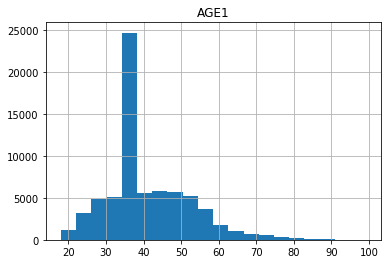

In [13]:
Telco.hist(column='AGE1', bins=20)

In [9]:
Telco['AGE1'].mean()

31.375112817500682

#        Data Cleaning

In [14]:
Telco['AGE1'].replace(0,Telco['AGE1'].median(),inplace=True)

In [15]:
Telco.isna().any()

AGE1         True
CHILDREN    False
CHURN       False
MARRYYES    False
MARRYNO     False
MARRYUN     False
INCOME      False
OCCSTUD     False
OCCSELF     False
OCCRET      False
OCCPROF     False
OCCHMKR     False
OCCCRFT     False
OCCCLER     False
NEWCELLY    False
MONTHS      False
MODELS       True
PHONES       True
PCOWN       False
CALLWAIT    False
MOU          True
INCALLS     False
EQPDAYS      True
DROPVCE     False
CUSTOMER    False
ROAM         True
REVENUE      True
RECCHRGE     True
PEAKVCE     False
OUTCALLS    False
dtype: bool

In [16]:
Telco=Telco.fillna(0) 

# Visualization

Text(0, 0.5, 'CHURN')

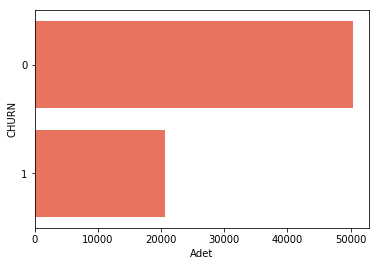

In [17]:
sns.countplot(y=Telco["CHURN"],color="tomato" )
plt.xlabel('Adet')
plt.ylabel('CHURN')


# DataPreprocessing

In [18]:
cols = [
"AGE1",
"CHILDREN",
"MARRYYES",
"MARRYNO",
"MARRYUN",
    
"INCOME",
"OCCSTUD",
"OCCSELF",
"OCCRET",
"CALLWAIT",
"INCALLS",
"MOU",
"EQPDAYS"
] 


In [19]:
X = Telco[cols]
Y = Telco['CHURN']

Normalization

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Z-skor 
X[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.37781459, -0.5656309 , -0.75877584, -0.5770523 ,  1.264376  ,
        -1.38162984, -0.0873512 , -0.13474815, -0.12134746,  0.14643796,
        -0.49499526, -0.63831469, -0.39426742],
       [-0.37781459, -0.5656309 , -0.75877584, -0.5770523 ,  1.264376  ,
        -1.38162984, -0.0873512 , -0.13474815, -0.12134746, 18.02448418,
        10.50248002,  5.22550976, -1.29479592],
       [-0.37781459, -0.5656309 , -0.75877584, -0.5770523 ,  1.264376  ,
        -1.38162984, -0.0873512 , -0.13474815, -0.12134746, -0.33350965,
        -0.4344587 ,  3.8819328 , -0.7560518 ],
       [-0.37781459, -0.5656309 , -0.75877584, -0.5770523 ,  1.264376  ,
        -1.38162984, -0.0873512 , -0.13474815, -0.12134746, -0.21352271,
        -0.15195473, -0.46288099, -0.53976766],
       [-0.37781459, -0.5656309 , -0.75877584, -0.5770523 ,  1.264376  ,
        -1.38162984, -0.0873512 , -0.13474815, -0.12134746, -0.33350965,
        -0.11159706, -0.4968359 , -0.53976766]])

# Create Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)#random_state=seed

In [23]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt=dt.fit(X,Y)

# Evaluation Metrics

In [24]:
print("Training:"+str(dt.score(X_train,Y_train)))
print("Test:"+str(dt.score(X_test,Y_test)))
y_pred= dt.predict(X_test)

Training:0.7155955923751307
Test:0.7117522871217452


=== Confusion Matrix ===
[[14892   167]
 [ 5977   279]]


              precision    recall  f1-score   support

           0       0.71      0.99      0.83     15059
           1       0.63      0.04      0.08      6256

   micro avg       0.71      0.71      0.71     21315
   macro avg       0.67      0.52      0.46     21315
weighted avg       0.69      0.71      0.61     21315



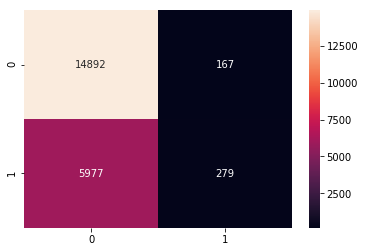

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, y_pred))
print('\n')
print(classification_report(Y_test, y_pred))
cm_dtree = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm_dtree,annot=True,fmt="d") 
plt.show()


In [27]:
importances=dt.feature_importances_

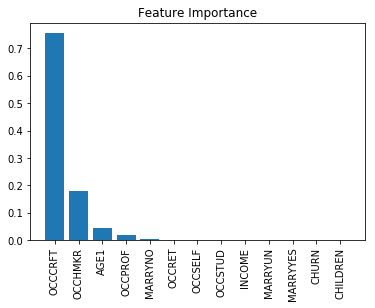

In [28]:
indices = np.argsort(importances)[::-1]
names = [Telco.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators = 1000,random_state = 1)
rf.fit(X_train,Y_train)
print("random forest algo result: ",rf.score(X_test,Y_test))

random forest algo result:  0.6958949096880132


RandomForest Metrics

In [31]:

y_pred_frst = rf.predict(X_test)
cm_frst = confusion_matrix(Y_test, y_pred_frst)

# Model Selection

In [ ]:
# Performance on Test data

cm_dtree #DecisionTree Metric
cm_frst #RandomForest Metric


In [32]:
# Testing Scores

dtree_acc = (cm_dtree[0,0] + cm_dtree[1,1]) / cm_dtree.sum()

frst_acc = (cm_frst[0,0] + cm_frst[1,1]) / cm_frst.sum()


In [34]:
acc_list = [dtree_acc,frst_acc]
models = [ 'Decision Tree Classifier', 'Random Forest Classifier']

model_accuracy = {}
model_accuracy['Model'] = models
model_accuracy['Scores'] = acc_list

accuracy_df = pd.DataFrame.from_dict(model_accuracy)
accuracy_df.head()

,Model,Scores
0,Decision Tree Classifier,0.711752
1,Random Forest Classifier,0.695895


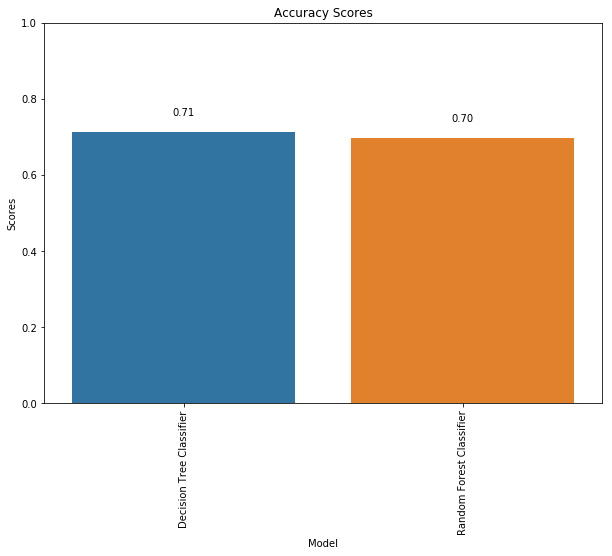

In [35]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x = 'Model', y = 'Scores', data = accuracy_df)
plt.xticks(rotation='vertical')
plt.ylim([0,1])
plt.title("Accuracy Scores")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 20), textcoords='offset points')  #horizontal bars